## Sample reduction variable, library imports, data import

### Sample scaling (downsampling for development purposes)

In [209]:
sample_size_ratio_config = 1 # sample_size = 1 means that all data will be used.
test_run = 0 # Set to 1 to just check for syntax and run with very small sample

### Imports except for model-specific sklearn imports

In [210]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from IPython.display import Image

# for plotting charts
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

#statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats

#### Additional libraries

In [211]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D

#### Data import

In [212]:
df = pd.read_csv("Intelligent_Couponing.csv")
if test_run == 1:
    rows = np.random.choice(df.index.values, 1000)
    df = df.ix[rows]
if sample_size_ratio_config != 1:
    import math
    df = df.sample(n=math.floor(sample_size_ratio_config*len(df.count())))
number_observations_original = df.customernumber.count()

## Business problem

### Why is the dependent variable important to know?
* The dependent variable indicates if a given customer will re-order within 90 days without getting a voucher.
* It is relevant because if a customer is likely to re-order within 90 days without getting a voucher, it may not make economic sense to provide him with a voucher.
* The voucher is worth 5 EUR.

### Limitations of the analysis:
* To evaluate the imporance of this order (i.e., the contribution margin), one actually needs to be able to approximate the expected contribution margin for the next order.
* In addition to the contribution margin of the next order, the change in customer lifetime value is imporant to estimate.
* The customer lifetime value in case of providing the customer with a voucher vs. not providing the customer with a voucher is the main concern. 
* The customer lifetime value could be approximated by the expected past contribution margin and by the purchasing behavior of the customer. 
* Here, do not directly calculate the customer lifetime value.
* We also don't have enough information to calculate the expected contribution margin over the next 90 days.

## EDA

Content

### Table of Content 

* Variable Indentification
    * How does the data looks like?
    * Data type & basic statistics (central tendency and spread for continous; count for categorical)
    * How do my variables look like? (predictor & target, continous & categorical, data types)
* Uni-variate Analyisis
    * Countinous variables - Do we have outliers?
    * Categorical variables - What is the share of each category?
* Bi-variante Analysis 
    * Target variable to categorical variables
     * Chi square test - Are there any significant associations between the two variables?
* Correlation with target variable

### Variable Identification
How does the data looks like?

In [213]:
print(df.head())

   customernumber        date  salutation  title  domain datecreated  \
0           41191  2008-12-01           0      0       9  2008-12-01   
1           38860  2008-12-16           1      0       4  2008-12-16   
2           61917  2008-08-19           0      0      12  2008-08-19   
3           40647  2008-06-16           1      0       8  2008-06-16   
4            1347  2008-08-08           0      0       1  2008-08-08   

   newsletter  model  paymenttype  deliverytype    ...     w2 w3  w4 w5  w6  \
0           0      2            2             0    ...      0  0   0  0   0   
1           0      1            1             1    ...      0  0   0  0   0   
2           0      1            0             0    ...      0  0   0  0   0   
3           0      1            0             0    ...      0  0   0  2   0   
4           0      1            1             1    ...      2  0   0  0   0   

   w7  w8  w9  w10  target90  
0   0   0   0    0         0  
1   0   0   0    0         0  

Data Types & Basic Description 

In [214]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32428 entries, 0 to 32427
Data columns (total 38 columns):
customernumber          32428 non-null int64
date                    32428 non-null object
salutation              32428 non-null int64
title                   32428 non-null int64
domain                  32428 non-null int64
datecreated             32428 non-null object
newsletter              32428 non-null int64
model                   32428 non-null int64
paymenttype             32428 non-null int64
deliverytype            32428 non-null int64
invoicepostcode         32428 non-null int64
delivpostcode           1392 non-null object
voucher                 32428 non-null int64
advertisingdatacode     6523 non-null object
case                    32428 non-null int64
numberitems             32428 non-null int64
gift                    32428 non-null int64
entry                   32428 non-null int64
points                  32428 non-null int64
shippingcosts           32428 non-

### How do the variables looks like?
Predictor variables & target variable

Target variable = target90

Predictor variables (n=31)
* To be dropped: customernumber, model, invoicepostcode, gift, points, title, delivpostcode, title, advertisingdatacode, remi, cancel, used
* To be transformed: date, datecreated, deliverydatepromised, deliverydatereal
* Probably highly correlated to other variables: entry, shippingcosts, deliverytype, numberitems, weight
* Others: Voucher, case, newsletter, salutation, domain, paymenttype, product categories (w0 to w10)

Data types
* Object
    * date
    * datecreated
    * delivpostcode
    * advertisingdatacode
    * deliverydatepromised
    * deliverydatereal
* int: The rest variables are int type

Variable category
* Continuous
    * weight
    * date, datecreate - might need transformation to create new variable
* Categorical: The rest

### Uni-variant analysis
#### Continuous variables
weight

/home/janspoerer/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


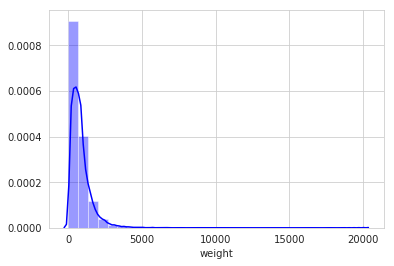

In [215]:
sns.distplot(df['weight'], bins = 30, color = "blue")

Question: Why do we have weights that equal 0 ?

No.of items

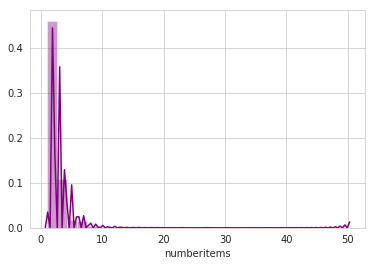

In [216]:
sns.distplot(df['numberitems'], bins = 30, color = "purple")

### Categorical Data - understand the distribution of each category
Data which has more than one category - count

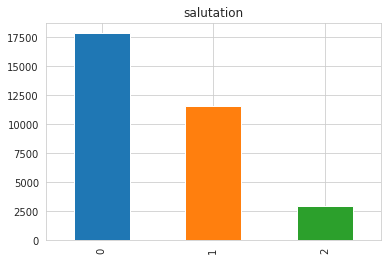

In [217]:
df = df.sort_values(by=['salutation'])
df['salutation'].value_counts().plot(kind = 'bar')
plt.title('salutation')
plt.show()

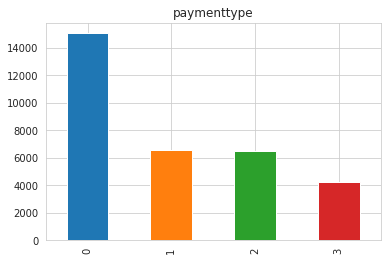

In [218]:
df = df.sort_values(by=['paymenttype'])
df['paymenttype'].value_counts().plot(kind = 'bar')
plt.title('paymenttype')
plt.show()

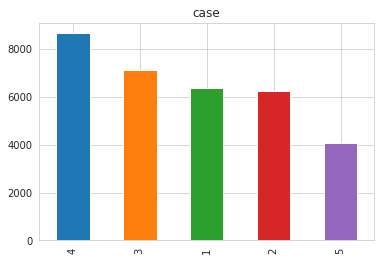

In [219]:
df = df.sort_values(by=['case'])
df['case'].value_counts().plot(kind = 'bar')
plt.title('case')
plt.show()

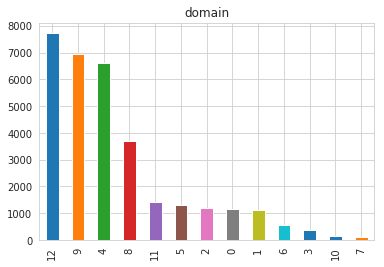

In [220]:
df = df.sort_values(by=['domain'])
df['domain'].value_counts().plot(kind = 'bar')
plt.title('domain')
plt.show()

Data which has either yes or no entry

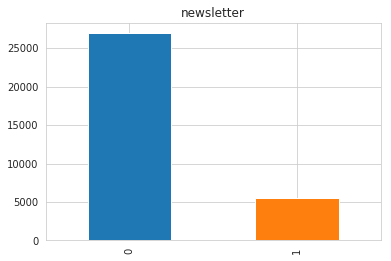

In [221]:
df = df.sort_values(by=['newsletter'])
df['newsletter'].value_counts().plot(kind = 'bar')
plt.title('newsletter')
plt.show()

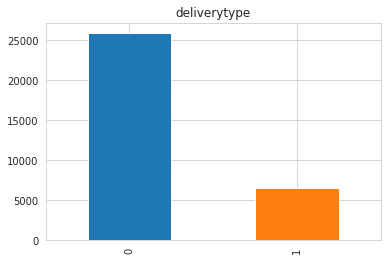

In [222]:
df = df.sort_values(by=['deliverytype'])
df['deliverytype'].value_counts().plot(kind = 'bar')
plt.title('deliverytype')
plt.show()

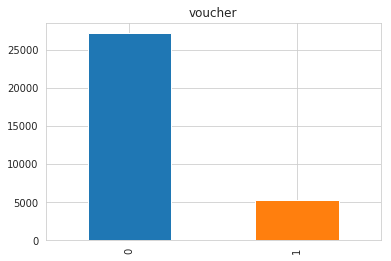

In [223]:
df = df.sort_values(by=['voucher'])
df['voucher'].value_counts().plot(kind = 'bar')
plt.title('voucher')
plt.show()

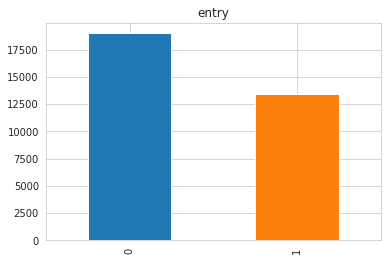

In [224]:
df = df.sort_values(by=['entry'])
df['entry'].value_counts().plot(kind = 'bar')
plt.title('entry')
plt.show()

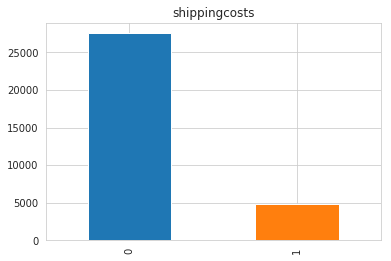

In [225]:
df = df.sort_values(by=['shippingcosts'])
df['shippingcosts'].value_counts().plot(kind = 'bar')
plt.title('shippingcosts')
plt.show()

### Bi-Variant Analysis
Target 90 against other Catgorical Variables
Chi-squred to test aossiciation(if knowing A will help you to predict B)

In [226]:
# Target90 against salutation (female, male or company)
df_group1 = df.groupby(['target90','salutation'])['target90'].count().unstack('target90').fillna(99)

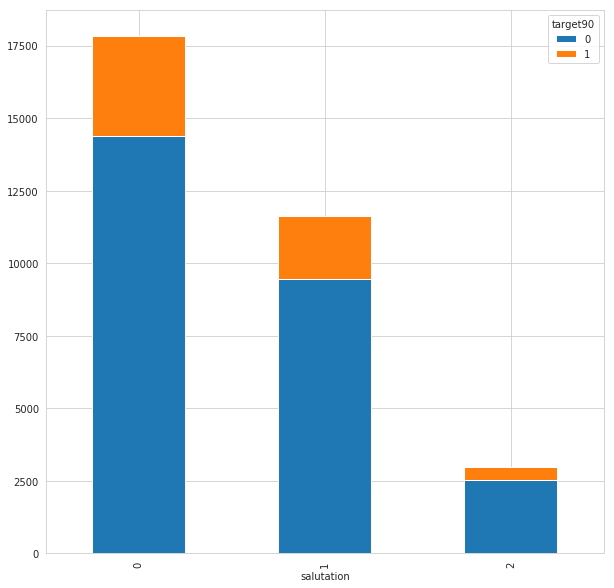

In [227]:
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )

In [228]:
df_group1

target90        0     1
salutation             
0           14391  3449
1            9454  2160
2            2532   442

* null-hypothesis: they are indenpent
* chi-square test for the independance between target90 and gender
* results shows that they are dependent

In [229]:
scipy.stats.chi2_contingency(df_group1)

(33.61449988992723,
 5.020004343733141e-08,
 2,
 array([[14511.09164919,  3328.90835081],
        [ 9446.85080794,  2167.14919206],
        [ 2419.05754286,   554.94245714]]))

In [230]:
# Target90 against newsletter
df_group1 = df.groupby(['target90','newsletter'])['target90'].count().unstack('target90').fillna(99)

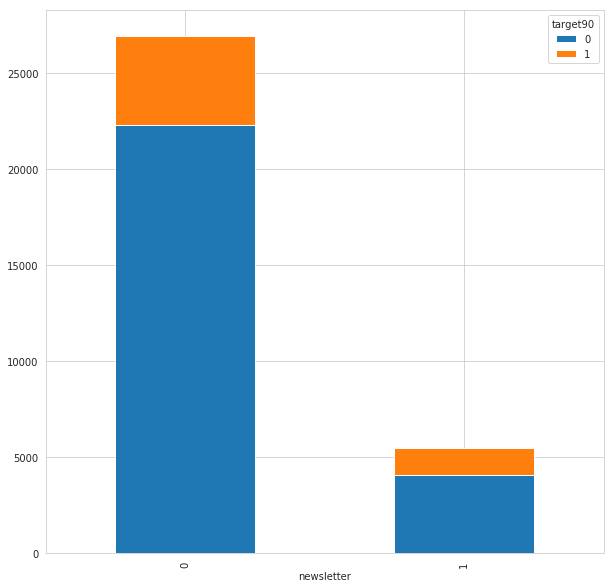

In [231]:
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )

In [232]:
df_group1

target90        0     1
newsletter             
0           22300  4632
1            4077  1419

chi-square test for the independance between target90 and gender
result: dependent

In [233]:
scipy.stats.chi2_contingency(df_group1)

(222.88637220493683,
 2.1223178094999486e-50,
 1,
 array([[21906.54261749,  5025.45738251],
        [ 4470.45738251,  1025.54261749]]))

Target90 against domain (assumption: domain may be an indicator that if you are a sophisticated user)

In [234]:
df_group1 = df.groupby(['target90','domain'])['target90'].count().unstack('target90').fillna(99)

<function matplotlib.pyplot.legend(*args, **kwargs)>

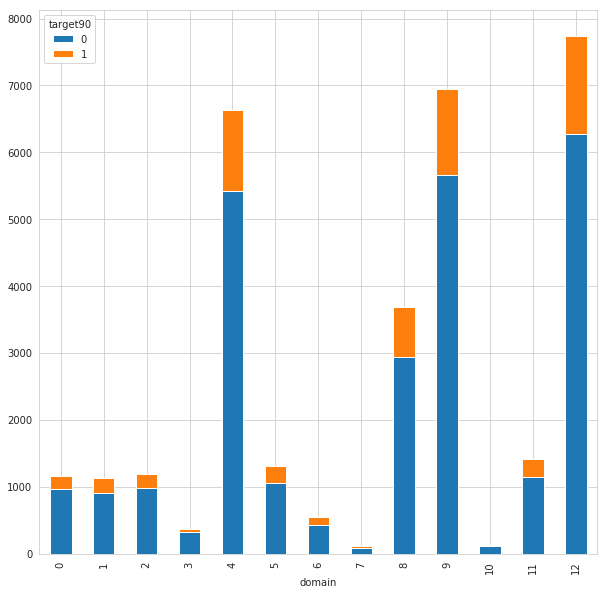

In [235]:
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )
plt.legend
# result: not dependent - drop this column 

In [236]:
scipy.stats.chi2_contingency(df_group1)

(17.01459045793761,
 0.14904928951059448,
 12,
 array([[ 954.12054397,  218.87945603],
        [ 926.46487603,  212.53512397],
        [ 972.82878993,  223.17121007],
        [ 309.90616134,   71.09383866],
        [5390.41504256, 1236.58495744],
        [1066.37001974,  244.62998026],
        [ 445.74429505,  102.25570495],
        [  91.9144258 ,   21.0855742 ],
        [3004.70698162,  689.29301838],
        [5655.58409399, 1297.41590601],
        [ 111.43607376,   25.56392624],
        [1156.65764154,  265.34235846],
        [6290.85105464, 1443.14894536]]))

In [237]:
# Target90 against payment type
df_group1 = df.groupby(['target90','paymenttype'])['target90'].count().unstack('target90').fillna(99)

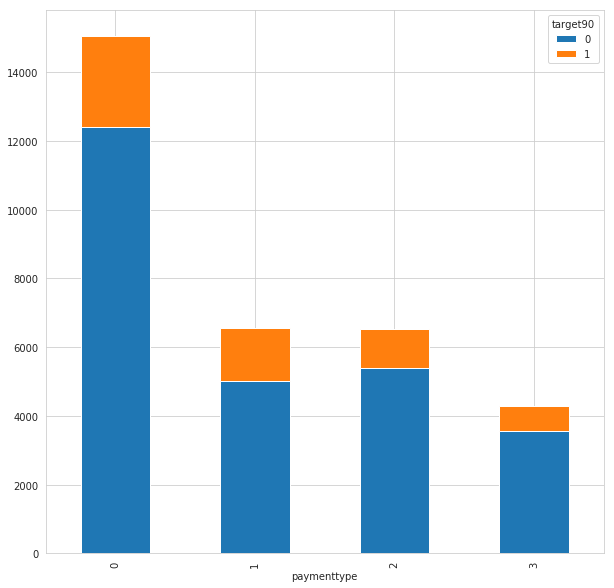

In [238]:
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )

In [239]:
df_group1

target90         0     1
paymenttype             
0            12404  2659
1             5015  1534
2             5403  1134
3             3555   724

In [240]:
scipy.stats.chi2_contingency(df_group1)
# result: dependent

(123.93478075493861,
 1.0962351516524858e-26,
 3,
 array([[12252.27429999,  2810.72570001],
        [ 5326.96968669,  1222.03031331],
        [ 5317.20886271,  1219.79113729],
        [ 3480.54715061,   798.45284939]]))

In [241]:
# target90 against deliverytype
df_group1 = df.groupby(['target90','deliverytype'])['target90'].count().unstack('target90').fillna(99)

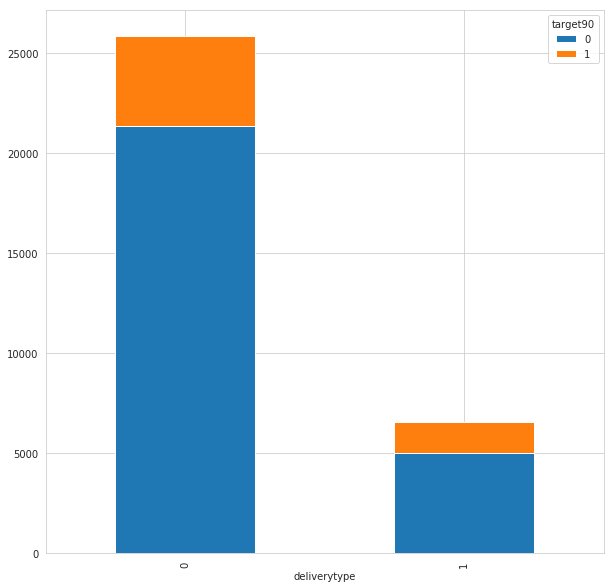

In [242]:
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )

In [243]:
df_group1

target90          0     1
deliverytype             
0             21362  4517
1              5015  1534

In [244]:
scipy.stats.chi2_contingency(df_group1)
#result: dependent

(122.29734581355343,
 1.9870967548672947e-28,
 1,
 array([[21050.03031331,  4828.96968669],
        [ 5326.96968669,  1222.03031331]]))

In [245]:
# target90 againset voucher (if previous vouncher cashed or not)
df_group1 = df.groupby(['target90','voucher'])['target90'].count().unstack('target90').fillna(99)

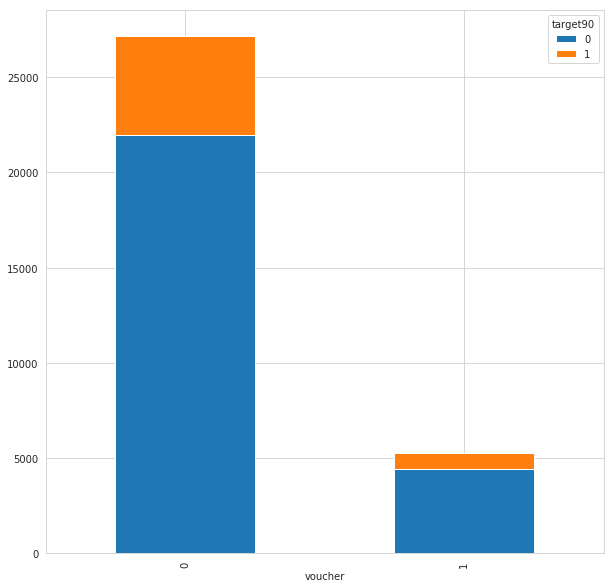

In [246]:
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )

In [247]:
df_group1

target90      0     1
voucher              
0         21967  5207
1          4410   844

In [248]:
scipy.stats.chi2_contingency(df_group1)
#result: dependent

(27.632049511170166,
 1.4672737696166663e-07,
 1,
 array([[22103.38590107,  5070.61409893],
        [ 4273.61409893,   980.38590107]]))

In [249]:
# target90 againset case
df_group1 = df.groupby(['target90','case'])['target90'].count().unstack('target90').fillna(99)

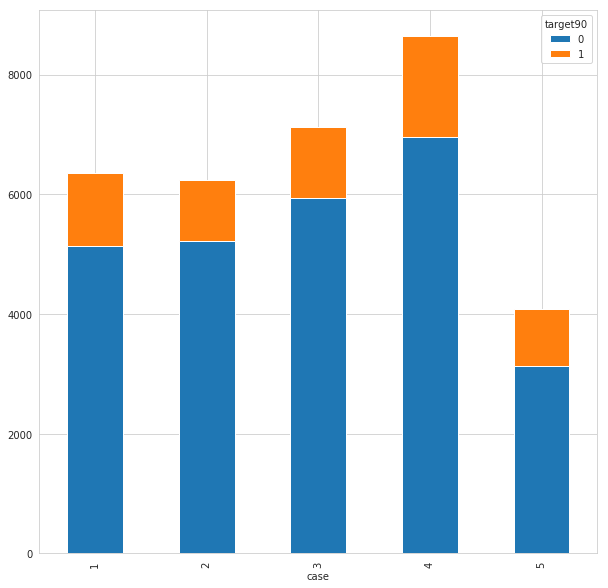

In [250]:
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )

In [251]:
df_group1

target90     0     1
case                
1         5127  1222
2         5218  1012
3         5934  1191
4         6959  1689
5         3139   937

In [252]:
scipy.stats.chi2_contingency(df_group1)
# result: dependent

(97.77207233228714,
 2.9311851256217804e-20,
 4,
 array([[5164.28928704, 1184.71071296],
        [5067.49444924, 1162.50555076],
        [5795.4892377 , 1329.5107623 ],
        [7034.30048107, 1613.69951893],
        [3315.42654496,  760.57345504]]))

In [253]:
# target90 against entry
df_group1 = df.groupby(['target90','entry'])['target90'].count().unstack('target90').fillna(99)

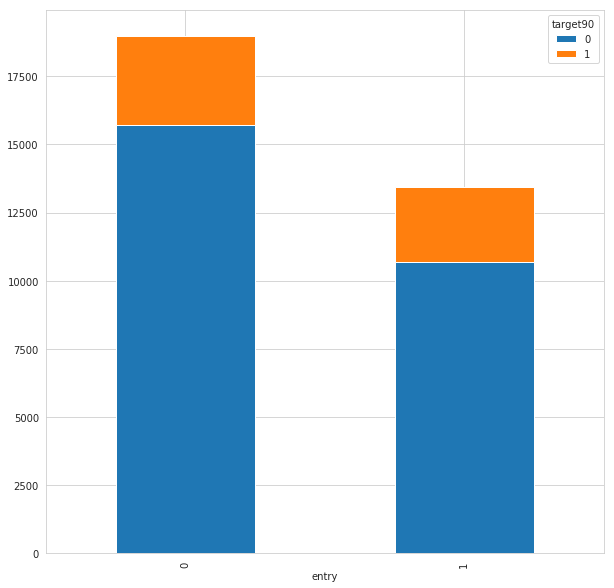

In [254]:
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )

In [255]:
df_group1

scipy.stats.chi2_contingency(df_group1)
# result: dependent

(55.07552842669487,
 1.1598603601574276e-13,
 1,
 array([[15439.99673122,  3542.00326878],
        [10937.00326878,  2508.99673122]]))

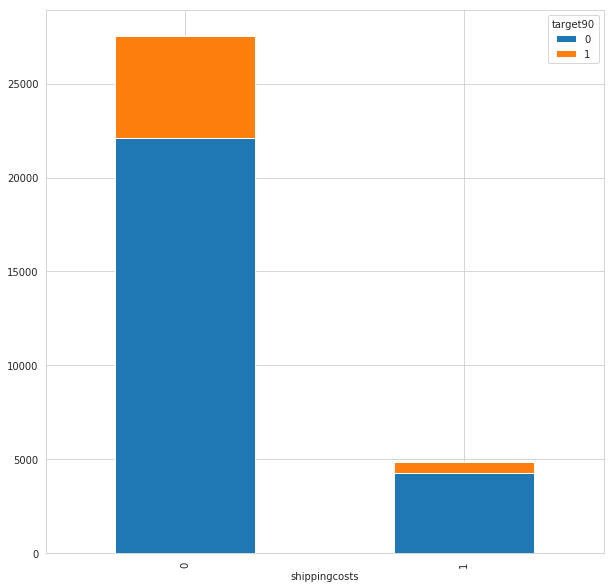

In [256]:
# target90 against shippingcosts
df_group1 = df.groupby(['target90','shippingcosts'])['target90'].count().unstack('target90').fillna(99)
df_group1.plot(kind='bar', figsize=(10,10), stacked = True )

In [257]:
df_group1

scipy.stats.chi2_contingency(df_group1)
# result: dependent

(162.47383487966454,
 3.2596449360277816e-37,
 1,
 array([[22404.34464043,  5139.65535957],
        [ 3972.65535957,   911.34464043]]))

### Conclusion (Can my variables predict the target 90?):
1. domain and target90 are independent,so our assumption is not right, drop the column
2. among all categorical varirable: newsletter, paymenttype, deliverytype, case, voucher, entry, shippingcosts are dependent with the target 90

Correlation of 11 product category and target 90

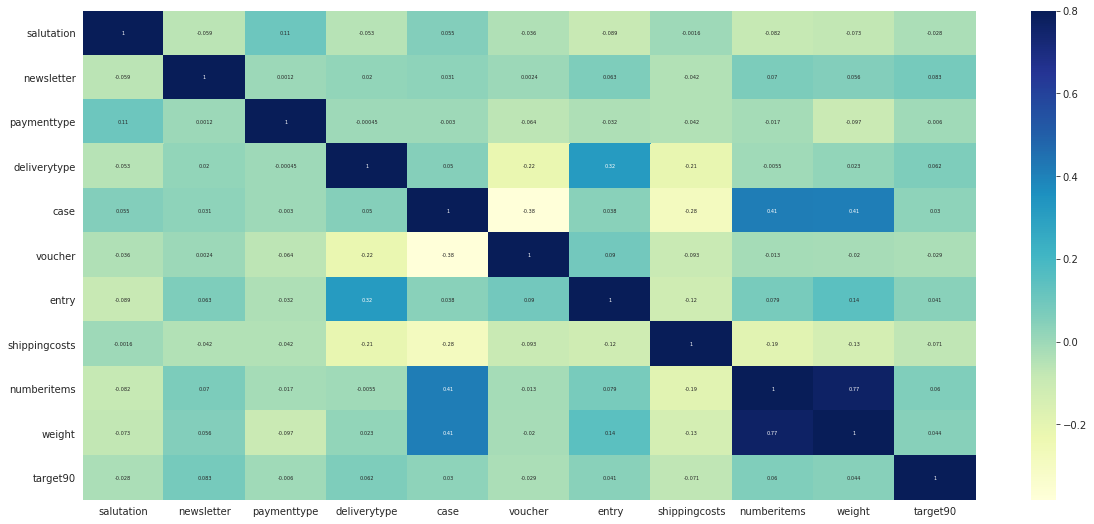

In [258]:
# correlation of other variable and target 90
df_heatmeat2 = df.loc [:,['salutation', 'newsletter', 'paymenttype','deliverytype','case','voucher', 'entry', 'shippingcosts','numberitems', 'weight', 'target90']]
corr = df_heatmeat2.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 5}, annot=True, cmap = "YlGnBu");

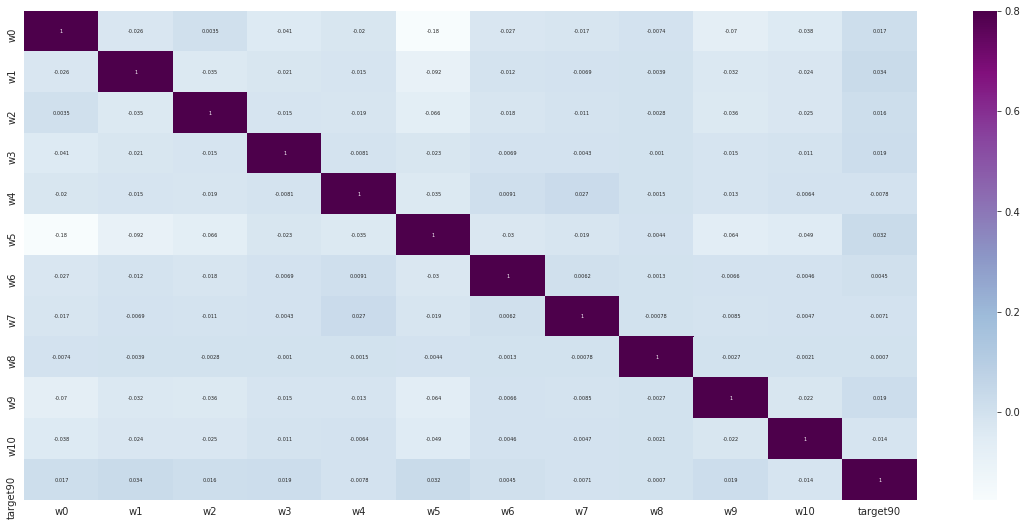

In [259]:
df_heatmap = df.iloc[:,26:38]
corr = df_heatmap.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 5}, annot=True, cmap = 'BuPu');

Conclusion from heatmap correlations: 
The heatmap gives us a visualization of the correlation matix, the correlation between weight & number of item is 0.77, 
Thus, we think they are highly correlcted, we need to remove one

Limitation: More thorough consideration of multicolinearity, maybe use PCA to remove features

## Variable Adoption

In [260]:
print(df.shape)
print(df['target90'].value_counts())

(32428, 38)
0    26377
1     6051
Name: target90, dtype: int64


### Easy drops and transformations

In [261]:
df = df.drop(['customernumber'], axis=1)

If deliverytype is collection/pickup, the deliverypostcode is always NAN. We think the postcodes may have some predictive power as a categorical variable, but they would require too much computational power because we would have to create many dummy variables. Therefore, we drop the invoicepostcode and the deliverypostcode and only leave the deliverytype.

In [262]:
df = df.drop(['delivpostcode', 'invoicepostcode'], axis=1)

Many missing values here and many different codes. We think the fact that a customer came as a result of a campaign is important. Therefore, the column is transformed to a dummy variable in the next line, we do not care about the specific type of advertising campaign.

In [263]:
print("Unique advertising data codes: ", df.advertisingdatacode.unique()) # Too many different codes, not usable as a categorical variable in that form.
df['hasadvertisingdatacode_custom'] = np.where(df['advertisingdatacode'].isna(), 0, 1) # Better transform it into boolean; it is not important which campaign it was, it is more important that the customer was acquired through a campaign at all.
df = df.drop(['advertisingdatacode'], axis=1) # And delete the old column.
print(df['hasadvertisingdatacode_custom'].value_counts())

Unique advertising data codes:  ['BL' nan 'BD' 'AQ' 'AB' 'BQ' 'CA' 'BX' 'BM' 'BT' 'BR' 'AE' 'BC' 'BB' 'AR'
 'BS' 'BO' 'AP' 'BF' 'BZ' 'AI' 'BY' 'AW' 'AL' 'AK' 'AM' 'AV' 'AT' 'BG'
 'AX' 'BI' 'AY' 'AH' 'AO' 'AZ' 'BK' 'AG' 'BV' 'AD' 'BA' 'AF' 'AU' 'BE'
 'AS' 'AC']
0    25905
1     6523
Name: hasadvertisingdatacode_custom, dtype: int64


### Easy drops and transformations

We assume the people that have "other" domains may take their account more serious (because they do not just use a trash email account) or they may be more sophisticated users.

In [264]:
df['domain_custom'] = np.where(df['domain'] == 12, 0, 1)

Already covered by number of individual item types (w0, w1...).

In [265]:
df = df.drop(['numberitems'], axis=1)

In [266]:
# Only 6 orders from category w8 shipped -> Drop.

In [267]:
df = df.drop(['w8'], axis=1)

### Transforming date columns

In [268]:
df['date'] = pd.to_datetime(df['date'])
df['datecreated'] = pd.to_datetime(df['datecreated'])
df['deliverydatepromised'] = pd.to_datetime(df['deliverydatepromised'], errors='coerce')
df['deliverydatereal'] = pd.to_datetime(df['deliverydatereal'], errors='coerce')


### Assumption: Customers are dissatisfied when there is a delay and the duration of the delay is not very important.

In [269]:
df.loc[(df['deliverydatereal'] > df['deliverydatepromised']), 'deliveryontime_custom'] = 0
print("custom", df['deliveryontime_custom'].isna().sum())
df.loc[(df['deliverydatereal'] <= df['deliverydatepromised']), 'deliveryontime_custom'] = 1
df.loc[(df['w3'] > 0), 'deliveryontime_custom'] = 1 # Intangible good, no delivery time
df.loc[(df['w5'] > 0), 'deliveryontime_custom'] = 1 # Intangible good, no delivery time
df.loc[(df['w10'] > 0), 'deliveryontime_custom'] = 1 # Intangible good, no delivery time
df.loc[(df['cancel'] > 0), 'deliveryontime_custom'] = 1 # Intangible good, no delivery time
df = df.dropna(subset=['deliveryontime_custom']) # Only 34 NAs left for deliveryontime_custom. We just drop those.
df = df.drop(['deliverydatepromised', 'deliverydatereal'], axis=1) # Not needed anymore.

custom 30536


Create new dummy column that is 1 if the customer ordered at the day of account creation.

In [270]:
df['time_to_first_order_custom'] = df['date'] - df['datecreated']
df['time_to_first_order_custom'] = df['time_to_first_order_custom'].dt.days
print(df['time_to_first_order_custom'].dtypes)
df['time_to_first_order_custom'] = pd.to_numeric(df['time_to_first_order_custom'])
df['ordered_directly_after_account_creation_custom'] = np.where(df['time_to_first_order_custom'] == 0, 1, 0)
df = df.drop(['time_to_first_order_custom', 'date', 'datecreated'], axis=1) # Not needed anymore.

int64


We are more interested if there were any used items in the order and less interested in the exact number of used items.

In [271]:
df['used_custom'] = np.where(df['used'] >= 0, 1, 0)
df = df.drop(['used'], axis=1)

We are more interested if there were any canceled items in the order and less interested in the exact number of canceled items.

In [272]:
df['cancel_custom'] = np.where(df['cancel'] >= 0, 1, 0)
df = df.drop(['cancel'], axis=1)

EPA showed that there is little correlation between remit and the target variable.

In [273]:
df = df.drop(['remi'], axis=1)

#### Checking unique values of categorical variables and dropping variables with unwanted properties (e.g., outliers)

In [274]:
print("Columns with missing values: ", df.columns[df.isnull().any()])
print("Unique salutations: ", df.salutation.unique()) # No outliers found (0  = Ms; 1 = Mr; 2 = Company)
print("Values for each category: ", df.salutation.value_counts(normalize=True))
print("Unique titles: ", df.title.unique()) # No outliers found (0 = no title; 1 = title)
print("Values for each category: ", df.title.value_counts(normalize=True))

Columns with missing values:  Index([], dtype='object')
Unique salutations:  [1 0 2]
Values for each category:  0    0.550164
1    0.358091
2    0.091745
Name: salutation, dtype: float64
Unique titles:  [0 1]
Values for each category:  0    0.993023
1    0.006977
Name: title, dtype: float64


In [275]:
df = df.drop(['title'], axis=1) # Drop because very rare (<0.01%) (but still a burden when computing).
print("Unique domains: ", df.domain.unique()) # No outliers found (0 = aol.com; 1 = arcor.de; 2 = freenet.de; 3 = gmail.com; 4 = gmx.de; 5 = hotmail.de; 6 = online.de; 7 = onlinehome.de; 8 = t-online.de; 9 = web.de; 10 = yahoo.com; 11 = yahoo.de; 12 = others)
print("Values for each category:\n", df.domain.value_counts(normalize=True))
print("Unique newsletters: ", df.newsletter.unique()) # No outliers found (0 = no; 1 = yes)

Unique domains:  [ 4  8 12  1  9  3 11  5  0  7  6  2 10]
Values for each category:
 12    0.238501
9     0.214422
4     0.204328
8     0.113910
11    0.043866
5     0.040378
2     0.036920
0     0.036149
1     0.035161
6     0.016886
3     0.011761
10    0.004229
7     0.003488
Name: domain, dtype: float64
Unique newsletters:  [0 1]


In [276]:
print("Values for each category: ", df.newsletter.value_counts(normalize=True))
print("Unique models: ", df.model.unique()) # No outliers found (models 1, 2, 3)
print("Values for each category: ", df.model.value_counts(normalize=True))
df = df.drop(['model'], axis=1) # We did not understand what model means and thought it is better to drop it. We cannot test it for plausibility.

Values for each category:  0    0.830462
1    0.169538
Name: newsletter, dtype: float64
Unique models:  [1 3 2]
Values for each category:  1    0.579614
3    0.227079
2    0.193307
Name: model, dtype: float64


In [277]:
print("Unique payment types: ", df.paymenttype.unique()) # No outliers found (0 = Payment on invoice; 1 = Cash payment; 2 = Transfer from current account; 3 = Transfer from credit card)
print("Values for each category: ", df.paymenttype.value_counts(normalize=True))
print("Unique delivery types: ", df.deliverytype.unique()) # No outliers found (Delivery type: 0 = Dispatch; 1 = collection)

Unique payment types:  [0 2 3 1]
Values for each category:  0    0.464407
1    0.201982
2    0.201550
3    0.132061
Name: paymenttype, dtype: float64
Unique delivery types:  [0 1]


In [278]:
print("Values for each category: ", df.deliverytype.value_counts(normalize=True))
print("Unique voucher redeptions: ", df.voucher.unique()) # No outliers found (Voucher redeemed: 0 = No; 1 = Yes)
print("Values for each category: ", df.voucher.value_counts(normalize=True))
print("Unique values of goods (case): ", df.case.unique()) # No outliers found (Value of goods: 1 = low; 5 = high)

Values for each category:  0    0.798018
1    0.201982
Name: deliverytype, dtype: float64
Unique voucher redeptions:  [0 1]
Values for each category:  0    0.837809
1    0.162191
Name: voucher, dtype: float64
Unique values of goods (case):  [3 1 4 2 5]


In [279]:
print("Values for each category: ", df.case.value_counts(normalize=True))
print("Unique gift options: ", df.gift.unique()) # Almost never with gift option, drop (Gift option: 0 = No; 1 = Yes)
print("Values for each category: ", df.gift.value_counts(normalize=True))
df = df.drop(['gift'], axis=1)

Values for each category:  4    0.266593
3    0.219639
1    0.195900
2    0.192073
5    0.125795
Name: case, dtype: float64
Unique gift options:  [0 1]
Values for each category:  0    0.995431
1    0.004569
Name: gift, dtype: float64


In [280]:
print("Unique entry: ", df.entry.unique()) # No outliers found (Entry into the shop: 0 = Shop; 1 = Partner)
print("Values for each category: ", df.entry.value_counts(normalize=True))
print("Unique points redeemed: ", df.points.unique()) # Always 0, drop (Points redeemed: 0 = No; 1 = Yes)
print("Values for each category: ", df.points.value_counts(normalize=True))
df = df.drop(['points'], axis=1)
print("Unique shipping costs incurred: ", df.shippingcosts.unique()) # No outliers found (Shipping costs incurred: 0 = No; 1 = Yes)
print("Values for each category: ", df.shippingcosts.value_counts(normalize=True))

Unique entry:  [0 1]
Values for each category:  0    0.585016
1    0.414984
Name: entry, dtype: float64
Unique points redeemed:  [0]
Values for each category:  0    1.0
Name: points, dtype: float64
Unique shipping costs incurred:  [0 1]
Values for each category:  0    0.849602
1    0.150398
Name: shippingcosts, dtype: float64


#### Weights

In [129]:
print(df.weight.head(8))

12328    1103
31086     656
1999     2110
626         0
3275     2768
16282     998
30858     714
23374     629
Name: weight, dtype: int64


Some weights are 0, but this is plausible. There are non-tangible items in the product portfolio of the company. In fact, we checked the orders that have a weight of 0 and they consist of non-tangible items.
The weight has a strong correlation with the number of items and the types of items. As we still have these variables in our dataframe, we drop weight.

In [130]:
df = df.drop(['weight'], axis=1)

### Comparing before and after

Number of observations in original dataset vs. now:

In [131]:
number_observations_original
df.target90.count()

32394

Number of columns original: 37, after:

In [132]:
len(df.columns)

26

This number will now increase dramatically as we create dummy variables.

### Creating dummies and dropping original category columns.

In [133]:
df = pd.get_dummies(df, columns=['salutation', 'domain_custom', 'newsletter', 'paymenttype', 'deliverytype'])
df = pd.get_dummies(df, columns=['voucher', 'case', 'entry', 'cancel_custom', 'used_custom', 'shippingcosts', 'hasadvertisingdatacode_custom'])

### Standardize and normalize

In [134]:
df_standardized = (df[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w9', 'w10']]-df[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w9', 'w10']].mean())/df[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w9', 'w10']].std()
df_normalized = (df_standardized[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w9', 'w10']]-df_standardized[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w9', 'w10']].min())/(df_standardized[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w9', 'w10']].max()-df_standardized[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w9', 'w10']].min())
df.merge(df_normalized)
df.shape

/home/janspoerer/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:970: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)
/home/janspoerer/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:970: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)
/home/janspoerer/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:970: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)
/home/janspoerer/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:970: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)
/home/janspoerer/anaconda3/lib/pytho

(32394, 42)

### Final deletion of NAs

We used our domain knowledge to decide against performing PCA to reduce the number of features. We believe the variables selected are meaningful and we already identified colinear variables (number of items vs. number of individual item types; weight vs. number of individual item types).

In [135]:
df = df.dropna(how='any') # Little number of NAs was found! Data is already pretty clean.
print(df.shape)

(32394, 42)


In [136]:
corr_matrix = df.corr()
corr_matrix["target90"].sort_values(ascending=False)

target90                                          1.000000
newsletter_1                                      0.082814
shippingcosts_0                                   0.070667
deliverytype_1                                    0.061361
paymenttype_1                                     0.061361
case_5                                            0.042025
entry_1                                           0.040889
w1                                                0.033869
w5                                                0.031978
voucher_0                                         0.029493
w9                                                0.019191
salutation_0                                      0.019029
w3                                                0.018892
w0                                                0.016538
w2                                                0.015995
case_4                                            0.013456
deliveryontime_custom                             0.0087

In [137]:
#df = df.drop(['cancel_custom_1', 'used_custom_1', 'domain_custom_0', 'domain_custom_1', 'hasadvertisingdatacode_custom_0', 'hasadvertisingdatacode_custom_1', 'salutation_1'], axis = 1)
df = df.drop(['deliveryontime_custom', 'domain', 'case_1', 'w6', 
              'domain_custom_0', 'hasadvertisingdatacode_custom_1', 
              'hasadvertisingdatacode_custom_0', 'salutation_1',
              'domain_custom_1', 'w7', 'w4', 'cancel_custom_1', 'used_custom_1'], axis=1) # Not needed anymore.


# Part 4: Cross Validation 

Balancing (to minimize getting biased samplies during sampling)
Since we have only about 6000 rows, we do not need to down sample


In [138]:
print("\n \n Data Frame")
print(df['target90'].value_counts())

from sklearn.utils import resample 
df_majority = df[df.target90==0]
df_minority = df[df.target90==1]
df_majority_balanced = resample(df_majority, 
                                n_samples=len(df_minority), 
                                replace=False, random_state=0) 
df_balanced = pd.concat([df_majority_balanced, 
                                  df_minority])
print("\n \n Cross Validation Data Frame After Balancing")
print(df_balanced['target90'].value_counts())


 
 Data Frame
0    26344
1     6050
Name: target90, dtype: int64

 
 Cross Validation Data Frame After Balancing
1    6050
0    6050
Name: target90, dtype: int64


In [139]:
#Partitioning
X = df_balanced.drop('target90', axis = 1)
Y = df_balanced['target90']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,
                                                    test_size=0.20, random_state=0)

print("\n \n Training Data Frame")
print(Y_train.value_counts()) 
print("\n \n Testing Data Frame")
print(Y_test.value_counts())

report = pd.DataFrame(columns=['Model','Mean Acc. Training','Standard Deviation','Acc. Test'])

# Cross validation
cross_validation_number_of_folds = 4
from sklearn.metrics import accuracy_score


 
 Training Data Frame
1    4840
0    4840
Name: target90, dtype: int64

 
 Testing Data Frame
1    1210
0    1210
Name: target90, dtype: int64


## Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression(solver = 'lbfgs')
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lrmodel, X_train, Y_train, scoring='accuracy', cv=cross_validation_number_of_folds)
print("\n \n  \n Logistic Regression  \n")
print("Accuracies = ", accuracies)
print("Mean = ", accuracies.mean())
print("SD = ", accuracies.std())
lrmodel.fit(X_train, Y_train)
Y_test_pred = lrmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Logistic Regression', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])


 
  
 Logistic Regression  

Accuracies =  [0.55743802 0.57644628 0.5785124  0.59008264]
Mean =  0.5756198347107437
SD =  0.011713254366163937
Model                 Logistic Regression
Mean Acc. Training                0.57562
Standard Deviation              0.0117133
Acc. Test                        0.573967
Name: 0, dtype: object


## Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(nbmodel, X_train, Y_train, scoring='accuracy', cv=cross_validation_number_of_folds)
print("\n \n  \nNaive Bayes  \n")
print("Accuracies = ", accuracies)
nbmodel.fit(X_train, Y_train)
Y_test_pred = nbmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Naive Bayes', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])


 
  
Naive Bayes  

Accuracies =  [0.5553719  0.55619835 0.56322314 0.57272727]
Model                 Naive Bayes
Mean Acc. Training        0.56188
Standard Deviation     0.00696606
Acc. Test                0.560744
Name: 1, dtype: object


## Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4., 5., 6., 7., 8., 9., 10., 11., 12.],
    'n_estimators': [100]
}
CV_rfmodel = GridSearchCV(estimator=rfmodel, param_grid=param_grid, cv=cross_validation_number_of_folds)
CV_rfmodel.fit(X_train, Y_train)
print("\n \n \n Random Forest \n")
print("Best parameters: ", CV_rfmodel.best_params_)
# Apply the best parameters
rfmodel = rfmodel.set_params(**CV_rfmodel.best_params_)
rfmodel.fit(X_train, Y_train)
Y_test_pred = rfmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Random Forest',
                          CV_rfmodel.cv_results_['mean_test_score'][CV_rfmodel.best_index_],
                          CV_rfmodel.cv_results_['std_test_score'][CV_rfmodel.best_index_], accte]
print(report.loc[len(report)-1])


 
 
 Random Forest 

Best parameters:  {'max_depth': 9.0, 'n_estimators': 100}
Model                 Random Forest
Mean Acc. Training         0.571384
Standard Deviation       0.00658164
Acc. Test                  0.570248
Name: 2, dtype: object


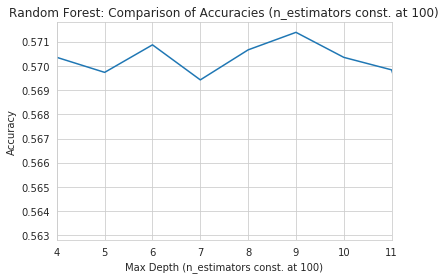

In [143]:
plt.plot(range(int(param_grid['max_depth'][0]), int(param_grid['max_depth'][-1] + 1)), CV_rfmodel.cv_results_['mean_test_score'])
plt.xlim(int(param_grid['max_depth'][0]), int(param_grid['max_depth'][-1])-1)
plt.xticks(range(int(param_grid['max_depth'][0]), int(param_grid['max_depth'][-1])))
plt.xlabel('Max Depth (n_estimators const. at 100)')
plt.ylabel('Accuracy')
plt.title('Random Forest: Comparison of Accuracies (n_estimators const. at 100)')
plt.show()

## Gradient Boosting Classifier

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2., 3., 4., 5.],
    'subsample': [0.8],
    'n_estimators': [100],
    'learning_rate': [0.2]
}
CV_gbmodel = GridSearchCV(estimator=gbmodel, param_grid=param_grid, cv=cross_validation_number_of_folds)
CV_gbmodel.fit(X_train, Y_train)
print("\n \n \n Gradient Boosting Classifier  \n")
print(CV_gbmodel.best_params_)


 
 
 Gradient Boosting Classifier  

{'learning_rate': 0.2, 'max_depth': 2.0, 'n_estimators': 100, 'subsample': 0.8}


In [145]:
gbmodel = gbmodel.set_params(**CV_gbmodel.best_params_)
gbmodel.fit(X_train, Y_train)
Y_test_pred = gbmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Gradient Boosting (grid)',
                          CV_gbmodel.cv_results_['mean_test_score'][CV_gbmodel.best_index_],
                          CV_gbmodel.cv_results_['std_test_score'][CV_gbmodel.best_index_], accte]
print(report.loc[len(report)-1])

print(CV_rfmodel.cv_results_['mean_test_score'])

Model                 Gradient Boosting (grid)
Mean Acc. Training                    0.569421
Standard Deviation                   0.0105554
Acc. Test                             0.578512
Name: 3, dtype: object
[0.57035124 0.5697314  0.57086777 0.56942149 0.57066116 0.5713843
 0.57035124 0.56983471 0.56322314]


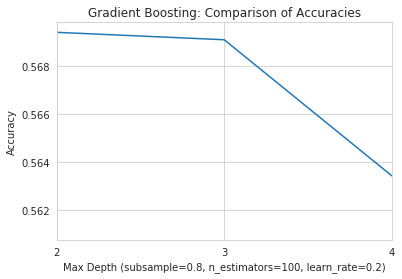

In [146]:
plt.plot(range(int(param_grid['max_depth'][0]), int(param_grid['max_depth'][-1] + 1)), CV_gbmodel.cv_results_['mean_test_score'])
plt.xlim(int(param_grid['max_depth'][0]), int(param_grid['max_depth'][-1])-1)
plt.xticks(range(int(param_grid['max_depth'][0]), int(param_grid['max_depth'][-1])))
plt.xlabel('Max Depth (subsample=0.8, n_estimators=100, learn_rate=0.2)')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting: Comparison of Accuracies')
plt.show()

## Neural Network

In [147]:
from sklearn.neural_network import MLPClassifier
nnetmodel = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid ={
        'hidden_layer_sizes': np.arange(1, 5),
        'alpha':  np.arange(10, 16),
        'activation': ['identity', 'logistic', 'tanh', 'relu']
}
CV_nnetmodel = GridSearchCV(estimator=nnetmodel, param_grid=param_grid, n_jobs=-1, verbose=2, cv=cross_validation_number_of_folds)
CV_nnetmodel.fit(X_train, Y_train)
print("\n \n \n Neural Network Classifier  \n")
print("Best parameters: ", CV_nnetmodel.best_params_)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   40.7s



 
 
 Neural Network Classifier  

Best parameters:  {'activation': 'tanh', 'alpha': 13, 'hidden_layer_sizes': 2}


[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   45.9s finished


In [148]:
nnetmodel = nnetmodel.set_params(**CV_nnetmodel.best_params_)
nnetmodel.fit(X_train, Y_train)
accuracies = cross_val_score(nnetmodel, X_train, Y_train, scoring='accuracy', cv=cross_validation_number_of_folds)
Y_test_pred = nnetmodel.predict(X_test)
acctest = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Neural Network', accuracies.mean(), accuracies.std(), acctest]
print(report.loc[len(report)-1])

Model                 Neural Network
Mean Acc. Training          0.578202
Standard Deviation         0.0130423
Acc. Test                    0.57562
Name: 4, dtype: object


## Final Report

In [149]:
print(report)

                      Model  Mean Acc. Training  Standard Deviation  Acc. Test
0       Logistic Regression            0.575620            0.011713   0.573967
1               Naive Bayes            0.561880            0.006966   0.560744
2             Random Forest            0.571384            0.006582   0.570248
3  Gradient Boosting (grid)            0.569421            0.010555   0.578512
4            Neural Network            0.578202            0.013042   0.575620


##  Ensembles

### Voting Ensembles

In [150]:
from mlxtend.classifier import EnsembleVoteClassifier
ens1model = EnsembleVoteClassifier(clfs=[lrmodel, nnetmodel, gbmodel], weights=[1,1,1])
accuracies = cross_val_score(ens1model, X_train, Y_train, scoring='accuracy', cv=cross_validation_number_of_folds)
ens1model.fit(X_train, Y_train)
Y_test_pred = ens1model.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Ensemble (equal, hard)', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])

Model                 Ensemble (equal, hard)
Mean Acc. Training                  0.578306
Standard Deviation                   0.01316
Acc. Test                            0.57686
Name: 5, dtype: object


In [151]:
from mlxtend.classifier import EnsembleVoteClassifier
ens1model = EnsembleVoteClassifier(clfs=[lrmodel, nnetmodel, gbmodel], weights=[1,1,1], voting='soft')
accuracies = cross_val_score(ens1model, X_train, Y_train, scoring='accuracy', cv=cross_validation_number_of_folds)
ens1model.fit(X_train, Y_train)
Y_test_pred = ens1model.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Ensemble (equal, soft)', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])

Model                 Ensemble (equal, soft)
Mean Acc. Training                   0.57469
Standard Deviation                 0.0137436
Acc. Test                           0.579752
Name: 6, dtype: object


In [152]:
print('Comparison with Ensemble (weighting):')
ens2model = EnsembleVoteClassifier(clfs=[lrmodel, nnetmodel, gbmodel], weights=[1,2,1])
accuracies = cross_val_score(ens2model, X_train, Y_train, scoring='accuracy', cv=cross_validation_number_of_folds)
ens2model.fit(X_train, Y_train)
Y_test_pred = ens2model.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Ens. (weighted, hard)', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])

Comparison with Ensemble (weighting):
Model                 Ens. (weighted, hard)
Mean Acc. Training                 0.577583
Standard Deviation                0.0134421
Acc. Test                           0.57562
Name: 7, dtype: object


In [153]:
print('Comparison with Ensemble (Soft Voting):')
ens3model = EnsembleVoteClassifier(clfs=[lrmodel, nnetmodel, gbmodel], weights=[1,1,2], voting='soft')
accuracies = cross_val_score(ens3model, X_train, Y_train, scoring='accuracy', cv=cross_validation_number_of_folds)
ens3model.fit(X_train, Y_train)
Y_test_pred = ens3model.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Ens. (weighted, soft)', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])

Comparison with Ensemble (Soft Voting):
Model                 Ens. (weighted, soft)
Mean Acc. Training                 0.573657
Standard Deviation                0.0124564
Acc. Test                          0.579339
Name: 8, dtype: object


### Stacking Ensemble

In [154]:
from sklearn.linear_model import LogisticRegression
lr_ensemble = LogisticRegression()

print('Comparison with Stacking based on Logistic Regression:')
from mlxtend.classifier import StackingClassifier
stens1model = StackingClassifier(classifiers=[lrmodel, nnetmodel, gbmodel],
                                 use_probas=True,
                                 average_probas=False,
                                 meta_classifier=lr_ensemble)
accuracies = cross_val_score(stens1model, X_train, Y_train, scoring='accuracy', cv=cross_validation_number_of_folds)
stens1model.fit(X_train, Y_train)
Y_test_pred = stens1model.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Stacking Ensemble', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])

Comparison with Stacking based on Logistic Regression:


/home/janspoerer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/janspoerer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/janspoerer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/janspoerer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model                 Stacking Ensemble
Mean Acc. Training             0.567975
Standard Deviation            0.0134552
Acc. Test                      0.577686
Name: 9, dtype: object


/home/janspoerer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [155]:
print(report)

                      Model  Mean Acc. Training  Standard Deviation  Acc. Test
0       Logistic Regression            0.575620            0.011713   0.573967
1               Naive Bayes            0.561880            0.006966   0.560744
2             Random Forest            0.571384            0.006582   0.570248
3  Gradient Boosting (grid)            0.569421            0.010555   0.578512
4            Neural Network            0.578202            0.013042   0.575620
5    Ensemble (equal, hard)            0.578306            0.013160   0.576860
6    Ensemble (equal, soft)            0.574690            0.013744   0.579752
7     Ens. (weighted, hard)            0.577583            0.013442   0.575620
8     Ens. (weighted, soft)            0.573657            0.012456   0.579339
9         Stacking Ensemble            0.567975            0.013455   0.577686


## Conclusion

Is the method feasible in practice?
* Yes, the media dealer aggregated over 30,000 rows of data about their customers. We therefore conclude that the marketing department could implement a data analytics model and use it on a regular basis for this specific purpose. The computing power needed is limited and the person that performs the analysis could work with a script that runs all steps from preprocessing to reporting. A qualified data analyst may be necessary to deal with changes in the data input and to refine the model (e.g., if new interesting variables are added to the ERP system). Scalability should not be a problem. In addition to implementing a predictive system, there should also be an evalution process in place that makes sure that the results are measured and compared to actual outcomes. Also, one should measure if doing the prediction actually pays of enough (cost for making the predictions vs. gains from better decisions).
* It would be interesting to know what the "Model" variable measures. We dropped this variable because we could not check the value for plausibility.

One deciding factor could be the return rate of the customer. Customers with high return rates should not be actively targeted because we believe that their contribution margin is lower than the contribution margin of customers that do not return their orders.